# Análise Exploratória dos Dados  
Agora que adquirimos os dados, vamos partir para análise exploratória e verificar a integridade dos dados também.

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.options.display.float_format = "{:,.2f}".format

In [2]:
TITLE_FONT = {'fontsize': 18, 'weight': 'bold',}

In [3]:
# Importando os dados
df = pd.read_parquet('../data/financial-data.parquet')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,"9,839.64",C1231006815,"170,136.00","160,296.36",M1979787155,0.00,0.00,0,0
1,1,PAYMENT,"1,864.28",C1666544295,"21,249.00","19,384.72",M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1,0
4,1,PAYMENT,"11,668.14",C2048537720,"41,554.00","29,885.86",M1230701703,0.00,0.00,0,0


In [4]:
df.index

RangeIndex(start=0, stop=1500000, step=1)

## Verificando dados faltantes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1500000 non-null  int64  
 1   type            1500000 non-null  object 
 2   amount          1500000 non-null  float64
 3   nameOrig        1500000 non-null  object 
 4   oldbalanceOrg   1500000 non-null  float64
 5   newbalanceOrig  1500000 non-null  float64
 6   nameDest        1500000 non-null  object 
 7   oldbalanceDest  1500000 non-null  float64
 8   newbalanceDest  1500000 non-null  float64
 9   isFraud         1500000 non-null  int64  
 10  isFlaggedFraud  1500000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 125.9+ MB


Não existem dados nulos

## Verificando a variável target

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,"1,500,000.00","1,500,000.00","1,500,000.00","1,500,000.00","1,500,000.00","1,500,000.00","1,500,000.00","1,500,000.00"
mean,59.15,"160,829.64","867,460.72","888,257.11","989,385.37","1,114,851.99",0.00,0.00
std,50.93,"267,660.37","2,951,754.60","2,988,125.99","2,301,935.27","2,406,375.82",0.03,0.00
min,1.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00
25%,17.00,"12,988.44",0.00,0.00,0.00,0.00,0.00,0.00
50%,38.00,"78,028.89","15,286.00",0.00,"133,626.51","224,440.36",0.00,0.00
75%,130.00,"216,230.95","125,777.86","167,023.76","936,451.51","1,152,678.68",0.00,0.00
max,143.00,"10,000,000.00","38,939,424.03","38,946,233.02","42,207,404.59","42,207,404.59",1.00,0.00


In [7]:
df['isFraud'].value_counts(normalize=True) * 100

0   99.89
1    0.11
Name: isFraud, dtype: float64

Como esperado a variável target está muito desbalanceado, com apenas 0,11% de fraude.  
Na modelagem será verificado a melhor forma de contornar esse problema.

In [8]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,"9,839.64",C1231006815,"170,136.00","160,296.36",M1979787155,0.00,0.00,0,0
1,1,PAYMENT,"1,864.28",C1666544295,"21,249.00","19,384.72",M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1,0
4,1,PAYMENT,"11,668.14",C2048537720,"41,554.00","29,885.86",M1230701703,0.00,0.00,0,0


## Verificando as Features

### Step  
Essa variável é a unidade de tempo em que a transação foi realizada, sendo que cada uma unidade representa uma hora.  
O data set original portanto possui 744 steps, ou 744 horas de transação - 31 dias de simulação.   
Para essa fase de modelagem foram selecionadas 1.5M de registros, vamos verificar quantos dias de transações temos nessa base.

In [9]:
# Qtd step (hora) / horas no dia
df['step'].max() / 24

5.958333333333333

Temos aproximadamente 6 dias de transações para podermos modelar.

In [10]:
df['step'].value_counts().sort_index()

1       2708
2       1014
3        552
4        565
5        665
       ...  
139    46054
140    37012
141    16434
142    12189
143     1535
Name: step, Length: 143, dtype: int64

Vemos que a quantidade de transações varia conforme a hora.  Esse pode ser uma feature para ser modificado para representar uma hora real, para ver se é possível gerar valor.

### Type

In [11]:
df['type'].value_counts().sort_values(ascending=False)

CASH_OUT    535211
PAYMENT     502308
CASH_IN     328503
TRANSFER    123993
DEBIT         9985
Name: type, dtype: int64

In [12]:
df_type_ordered = df.sort_values(by='type', ascending=False).copy()

In [13]:
df_type_ordered

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
258520,14,TRANSFER,"83,304.61",C1849472116,0.00,0.00,C1210929525,"332,730.60","416,035.21",0,0
882965,42,TRANSFER,"179,817.91",C558833408,0.00,0.00,C1569006508,"858,207.55","1,038,025.46",0,0
572518,24,TRANSFER,"875,847.75",C1206642984,0.00,0.00,C257229326,"5,616,736.95","6,492,584.69",0,0
882962,42,TRANSFER,"387,521.79",C115303301,0.00,0.00,C65098329,"573,021.61","1,310,251.50",0,0
1048515,95,TRANSFER,"169,285.09",C969909855,"140,856.00",0.00,C1753252271,0.00,"169,285.09",0,0
...,...,...,...,...,...,...,...,...,...,...,...
818649,40,CASH_IN,"3,928.18",C351161366,"21,515.00","25,443.18",C358227421,"1,215,784.09","1,211,855.90",0,0
818643,40,CASH_IN,"180,135.27",C487276447,"231,593.00","411,728.27",C130685659,0.00,0.00,0,0
818627,40,CASH_IN,"229,902.43",C921389747,"942,585.04","1,172,487.47",C375861708,0.00,0.00,0,0
818620,40,CASH_IN,"211,381.67",C384438998,"13,432.00","224,813.67",C814270414,"557,695.58","346,313.91",0,0


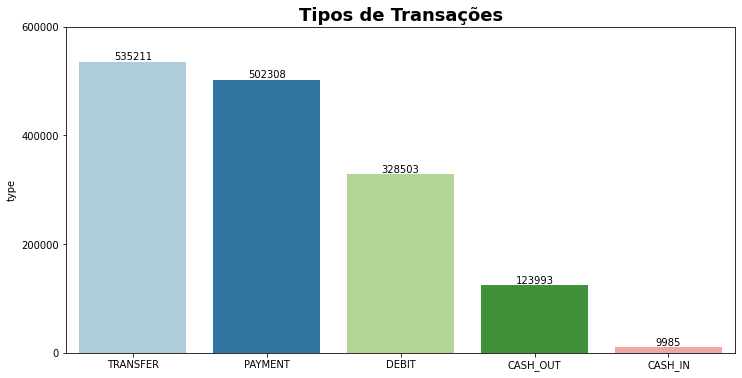

In [14]:
plt.figure(figsize=(12, 6))
plt.title('Tipos de Transações', fontdict=TITLE_FONT)

ax = sns.barplot(x=df_type_ordered['type'].unique(), y=df_type_ordered['type'].value_counts(), palette='Paired')
for container in ax.containers:
    ax.bar_label(container)

plt.yticks(np.arange(0, 6e5+1, 2e5))

plt.show()

Os tipos de transação mais frequente são de transferencia e pagamento.  
Será que podemos observar esse mesmo comportamento entre as fraudes?

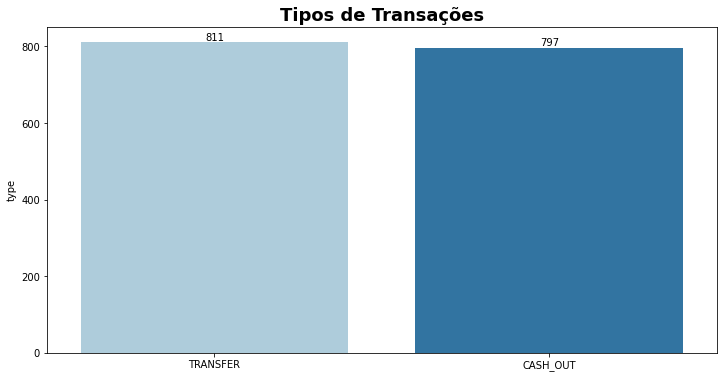

In [15]:
only_fraud = df_type_ordered.query('isFraud==1').copy()

plt.figure(figsize=(12, 6))
plt.title('Tipos de Transações', fontdict=TITLE_FONT)

ax = sns.barplot(x=only_fraud['type'].unique(), y=only_fraud['type'].value_counts(), palette='Paired')
for container in ax.containers:
    ax.bar_label(container)

plt.yticks(np.arange(0, 1000, 200))

plt.show()

Uma grande surpresa: só temos fraudes em casos de transferências e saques.  
Dessa forma, na fase de modelagem podemos manter somente esses dois tipos de movimetanções.

In [16]:
transf_type = ['TRANSFER', 'CASH_OUT']

df_filtered = df.query('type in @transf_type').copy()

df_filtered.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1,0
15,1,CASH_OUT,"229,133.94",C905080434,"15,325.00",0.00,C476402209,"5,083.00","51,513.44",0,0
19,1,TRANSFER,"215,310.30",C1670993182,705.00,0.00,C1100439041,"22,425.00",0.00,0,0
24,1,TRANSFER,"311,685.89",C1984094095,"10,835.00",0.00,C932583850,"6,267.00","2,719,172.89",0,0


In [17]:
df_filtered['isFraud'].value_counts(normalize=True) * 100

0   99.76
1    0.24
Name: isFraud, dtype: float64

### Amount

In [18]:
df_filtered.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,"659,204.00","659,204.00","659,204.00","659,204.00","659,204.00","659,204.00","659,204.00","659,204.00"
mean,59.21,"271,477.09","54,334.34","21,176.07","1,505,833.66","1,834,182.12",0.00,0.00
std,51.02,"353,639.98","209,897.11","135,436.45","2,708,975.10","2,831,213.53",0.05,0.00
min,1.00,0.37,0.00,0.00,0.00,0.00,0.00,0.00
25%,17.00,"86,909.74",0.00,0.00,"125,743.54","340,815.98",0.00,0.00
50%,38.00,"178,940.89",286.00,0.00,"556,436.14","866,673.78",0.00,0.00
75%,131.00,"318,524.40","31,957.00",0.00,"1,675,147.69","2,112,130.08",0.00,0.00
max,143.00,"10,000,000.00","19,887,819.06","13,796,061.54","42,169,156.09","42,207,404.59",1.00,0.00


In [19]:
df_filtered['amount'].min()

0.37

In [20]:
df_filtered['amount'].max()

10000000.0

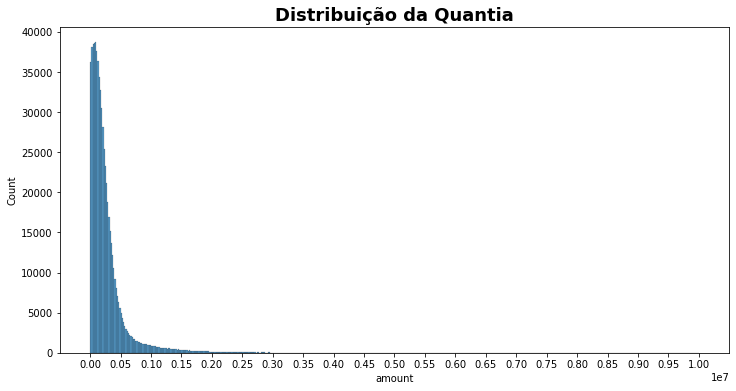

In [21]:
plt.figure(figsize=(12, 6))
plt.title('Distribuição da Quantia', fontdict=TITLE_FONT)
sns.histplot(data=df_filtered, x='amount', bins=500)
plt.xticks(np.arange(0, 1e7+1, 500000))
plt.yticks(np.arange(0, 40001, 5000))

plt.show()

Vemos aqui uma distribuição distorcida à direita, o que indica que a maior porção das transações são de quantias baixas.  
O menor valor encontrado dentro do dataset foi de \$0,37 e o maior de \$10M, um espaçamento considerável.

In [22]:
df_filtered

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1,0
15,1,CASH_OUT,"229,133.94",C905080434,"15,325.00",0.00,C476402209,"5,083.00","51,513.44",0,0
19,1,TRANSFER,"215,310.30",C1670993182,705.00,0.00,C1100439041,"22,425.00",0.00,0,0
24,1,TRANSFER,"311,685.89",C1984094095,"10,835.00",0.00,C932583850,"6,267.00","2,719,172.89",0,0
...,...,...,...,...,...,...,...,...,...,...,...
1499923,143,TRANSFER,"561,483.35",C1444576742,0.00,0.00,C348049529,"1,306,825.35","1,770,314.58",0,0
1499924,143,TRANSFER,"196,751.21",C1001986271,"30,199.00",0.00,C1134680331,"138,715.26","335,466.46",0,0
1499932,143,TRANSFER,"17,900.69",C486733099,"104,815.00","86,914.31",C1121989629,"530,387.42","548,288.11",0,0
1499970,143,TRANSFER,"317,982.84",C1943461768,"20,909.00",0.00,C429511913,"2,194.63","258,791.43",0,0


### Name (Conta de origem e destino)  
Vamos verificar as colunas de conta origem (nameOrig) e destino (nameDest).

In [23]:
print('Quantidade de registro no dataset: {:,}'.format(df_filtered.shape[0]))
print('Quantidade de conta origem único: {:,}'.format(df_filtered['nameOrig'].nunique()))
print('Quantidade de conta origem destino: {:,}'.format(df_filtered['nameDest'].nunique()))


Quantidade de registro no dataset: 659,204
Quantidade de conta origem único: 659,080
Quantidade de conta origem destino: 122,393


Agora quero verificar se existem casos de transações que em que as contas origem e destino são as mesmas, e se isso pode ser um indicador de fraude ou não.

In [24]:
df_filtered.query('nameOrig == nameDest')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


Aparentemente não existem transações onde o remetente e o destinatário são os mesmos.  
Vamos verificar também se a frequência em que a mesma conta realiza uma movimentação.

In [25]:
print('Qtd de contas que movimentaram mais de uma vez: ', sum(df_filtered['nameOrig'].value_counts(ascending=False) > 1))

Qtd de contas que movimentaram mais de uma vez:  124


Como temos várias contas diferentes, a distribuição parece mais uniforme.

In [26]:
sum(df_filtered['nameDest'].value_counts(ascending=False) > 1)

92507

In [27]:
df_filtered['nameDest'].value_counts(ascending=False)

C1286084959    64
C1360767589    60
C248609774     60
C2083562754    57
C665576141     57
               ..
C1884798465     1
C1394225013     1
C360198352      1
C290645941      1
C382389804      1
Name: nameDest, Length: 122393, dtype: int64

In [28]:
counts_dest = df_filtered.groupby('nameDest')['nameDest'].value_counts()
counts_dest[counts_dest > 1].sort_values(ascending=False)[:10]

nameDest     nameDest   
C1286084959  C1286084959    64
C1360767589  C1360767589    60
C248609774   C248609774     60
C2083562754  C2083562754    57
C665576141   C665576141     57
C97730845    C97730845      56
C306206744   C306206744     56
C2006081398  C2006081398    55
C985934102   C985934102     54
C1590550415  C1590550415    53
Name: nameDest, dtype: int64

Será que uma mesma conta pode ter várias fraudes?

In [29]:
count_fraud_by_dest = df_filtered.query('isFraud == 1').groupby('nameDest')['nameDest'].count()
print(f'Qtd de conta destino com mais que uma fraude: {count_fraud_by_dest[count_fraud_by_dest > 1].sum()}')
print(f'Qtd máxima que uma mesma conta fraudou: {count_fraud_by_dest[count_fraud_by_dest > 1].max()}')

Qtd de conta destino com mais que uma fraude: 22
Qtd máxima que uma mesma conta fraudou: 2


Analisando as contas de origem e destino, vemos que apesar do destino do dinheiro aparecer mais vezes, isso não parece indicar que essas features serão úteis na modelagem.  
Portanto elas serão eliminadas do modelo.

### Balances (Saldos)
O dataset nos fornece quatro variáveis referentes ao saldo: saldo inicial e final para conta de origem e destino.  
Vamos avaliar rapidamente essas variáveis.

#### oldbalanceOrg

In [30]:
df_filtered['oldbalanceOrg'].describe()

count      659,204.00
mean        54,334.34
std        209,897.11
min              0.00
25%              0.00
50%            286.00
75%         31,957.00
max     19,887,819.06
Name: oldbalanceOrg, dtype: float64

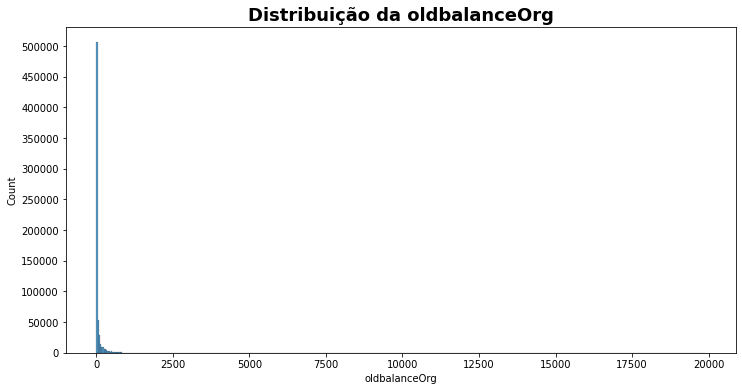

In [31]:
plt.figure(figsize=(12, 6))
plt.title('Distribuição da oldbalanceOrg', fontdict=TITLE_FONT)
sns.histplot(x=df_filtered['oldbalanceOrg']/1000, bins=500)
# plt.xticks(np.arange(0, 1_000_000_000+1, 500_000_000))
plt.yticks(np.arange(0, 5e5 + 1, 5e4))

plt.show()

#### newbalanceOrig

In [32]:
df_filtered['newbalanceOrig'].describe()

count      659,204.00
mean        21,176.07
std        135,436.45
min              0.00
25%              0.00
50%              0.00
75%              0.00
max     13,796,061.54
Name: newbalanceOrig, dtype: float64

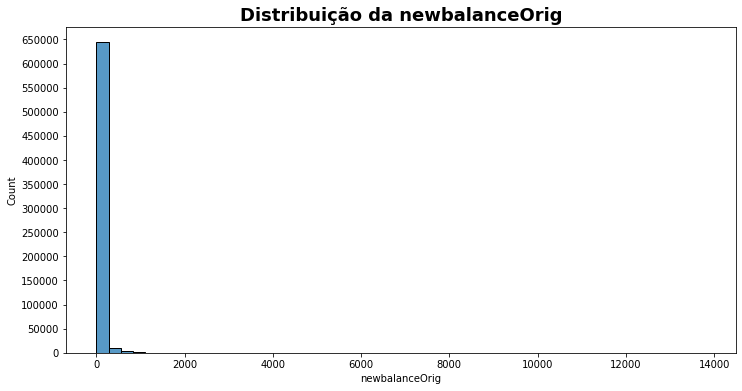

In [33]:
plt.figure(figsize=(12, 6))
plt.title('Distribuição da newbalanceOrig', fontdict=TITLE_FONT)
sns.histplot(x=df_filtered['newbalanceOrig']/1000, bins=50)
# plt.xticks(np.arange(0, 1_000_000_000+1, 500_000_000))
plt.yticks(np.arange(0, 65e4 + 1, 5e4))

plt.show()

#### oldbalanceDest

In [34]:
df_filtered['oldbalanceDest'].describe()

count      659,204.00
mean     1,505,833.66
std      2,708,975.10
min              0.00
25%        125,743.54
50%        556,436.14
75%      1,675,147.69
max     42,169,156.09
Name: oldbalanceDest, dtype: float64

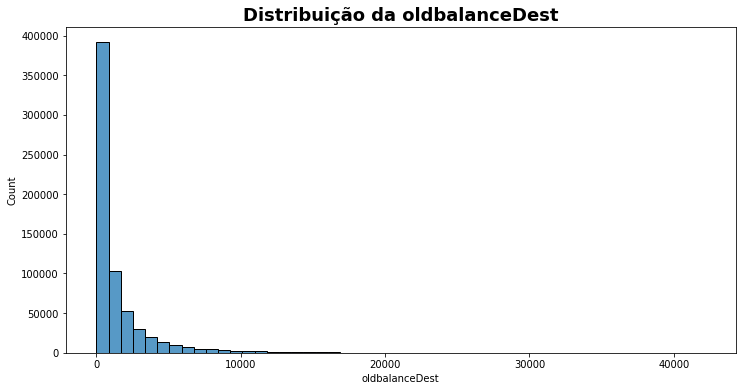

In [35]:
plt.figure(figsize=(12, 6))
plt.title('Distribuição da oldbalanceDest', fontdict=TITLE_FONT)
sns.histplot(x=df_filtered['oldbalanceDest']/1000, bins=50)
# plt.xticks(np.arange(0, 1_000_000_000+1, 500_000_000))
# plt.yticks(np.arange(0, 65e4 + 1, 5e4))

plt.show()

In [36]:
df_filtered['newbalanceDest'].describe()

count      659,204.00
mean     1,834,182.12
std      2,831,213.53
min              0.00
25%        340,815.98
50%        866,673.78
75%      2,112,130.08
max     42,207,404.59
Name: newbalanceDest, dtype: float64

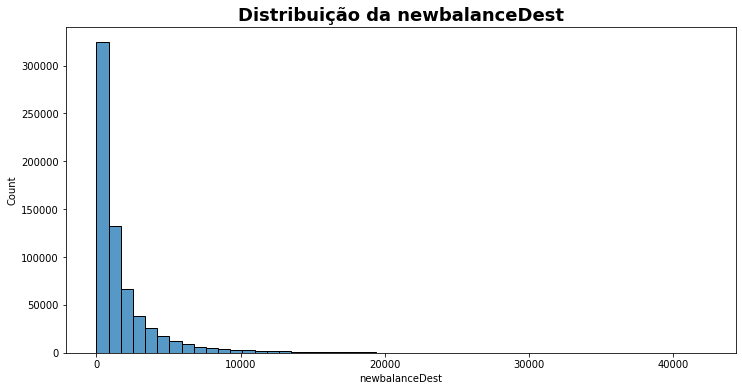

In [37]:
plt.figure(figsize=(12, 6))
plt.title('Distribuição da newbalanceDest', fontdict=TITLE_FONT)
sns.histplot(x=df_filtered['newbalanceDest']/1000, bins=50)
# plt.xticks(np.arange(0, 1_000_000_000+1, 500_000_000))
# plt.yticks(np.arange(0, 65e4 + 1, 5e4))

plt.show()

Pode-se observar que as quatro features estão altamente desbalanceadas, distorcida à direita.  
Para obter um resultado satisfatório, será necessário balanceá-los.


### isFlaggedFraud



In [38]:
df_filtered['isFlaggedFraud'].sum()

0

Essa feature foi criada pelo criador do dataset para marcar operações com valor igual ou superior à $200 k em que o seu modelo classificou que houve tentativa de fraude.  
Para o nosso cenário essa feature não será útil, portanto será descartado .

## Conclusão
Nessa primeira exploração foi verificado cada uma das 10 features mais a variável alvo. Constata-se que a tanto as features com valores monetários como a variável alvo estão altamente desbalanceados, o que já era de se esperar nesse cenário.   
Foi possível reduzir o tamanho dos dados a serem analisados ao constatar-se que somente as transações do tipo saque e transferências possuem fraudes.   
Haja vista que a amostragem escolhida para essa análise representa apenas 6 dias de transações, não houve muitos casos de fraude onde a mesma conta estivesse envolvida - apenas 22 ocorrências e mesmo assim cada conta no máximo 2 vezes. Sendo assim a princípio essas colunas podem não ter tanta utilidade no desenvolvimento do modelo - e talvez não devesse ser utilizado mesmo que tivesse, para evitar que o modelo carregue o viés.  
Finalizado a análise exploratória, vamos partir para a criação do primeiro modelo que servirá de baseline.